In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv("C:/Users/ullas/Documents/Kalyani/da_ca1/Population estimates from 1926.csv")

In [3]:
df.head()

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [4]:
pd.set_option('display.max_rows', None)
print(df)

                      STATISTIC Label  Year Single Year of Age         Sex  \
0      Population estimates from 1926  1926           All ages  Both sexes   
1      Population estimates from 1926  1926           All ages        Male   
2      Population estimates from 1926  1926           All ages      Female   
3      Population estimates from 1926  1926       Under 1 year  Both sexes   
4      Population estimates from 1926  1926       Under 1 year        Male   
5      Population estimates from 1926  1926       Under 1 year      Female   
6      Population estimates from 1926  1926             1 year  Both sexes   
7      Population estimates from 1926  1926             1 year        Male   
8      Population estimates from 1926  1926             1 year      Female   
9      Population estimates from 1926  1926            2 years  Both sexes   
10     Population estimates from 1926  1926            2 years        Male   
11     Population estimates from 1926  1926            2 years  

In [5]:
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64


In [6]:
#Descriptive Statistics
df.describe()

,Year,VALUE
count,11817.000000,1.181700e+04
mean,1996.410256,5.352461e+04
std,24.463165,2.867754e+05
min,1926.000000,6.000000e+00
25%,1986.000000,1.242700e+04
50%,2004.000000,2.667500e+04
75%,2014.000000,3.557700e+04
max,2023.000000,5.281612e+06


In [7]:
statistics = df['VALUE'].describe()
print("Descriptive Statistics for 'VALUE':")
print(statistics)

Descriptive Statistics for 'VALUE':
count    1.181700e+04
mean     5.352461e+04
std      2.867754e+05
min      6.000000e+00
25%      1.242700e+04
50%      2.667500e+04
75%      3.557700e+04
max      5.281612e+06
Name: VALUE, dtype: float64


In [8]:
# Rename the 'Sex' column to 'Gender'
df = df.rename(columns={'Sex': 'Gender'})

# Replace 'Both sexes' with 'Both Genders' in the 'Gender' column
df['Gender'] = df['Gender'].replace('Both sexes', 'Both Genders')

df.drop(['UNIT'], axis = 1, inplace = True)

In [9]:
df.head()

,STATISTIC Label,Year,Single Year of Age,Gender,VALUE
0,Population estimates from 1926,1926,All ages,Both Genders,2971992
1,Population estimates from 1926,1926,All ages,Male,1506889
2,Population estimates from 1926,1926,All ages,Female,1465103
3,Population estimates from 1926,1926,Under 1 year,Both Genders,55391
4,Population estimates from 1926,1926,Under 1 year,Male,28084


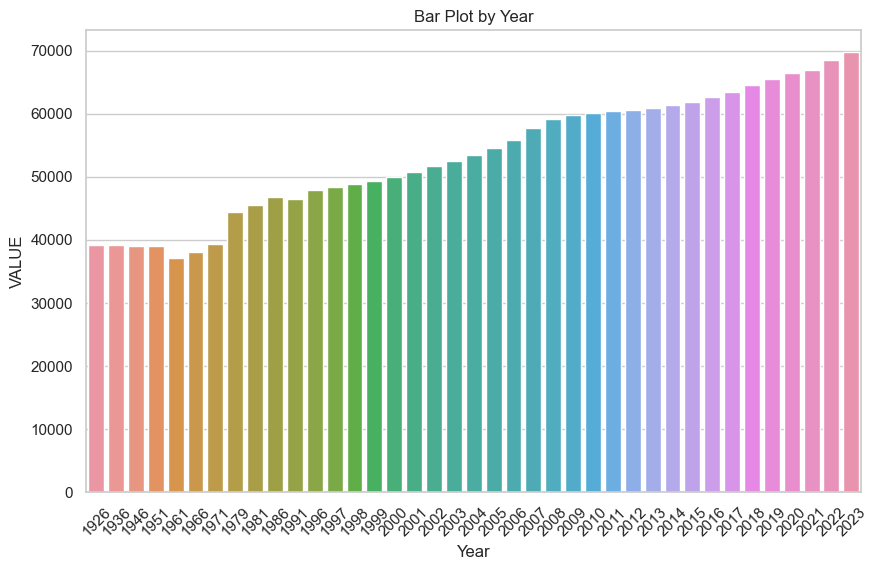

In [10]:
# Creating a bar plot for the VALUE column by Year
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Year', y='VALUE', data=df, ci=None)
bar_plot.set(xlabel='Year', ylabel='VALUE', title='Bar Plot by Year')
plt.xticks(rotation=45)
plt.show()

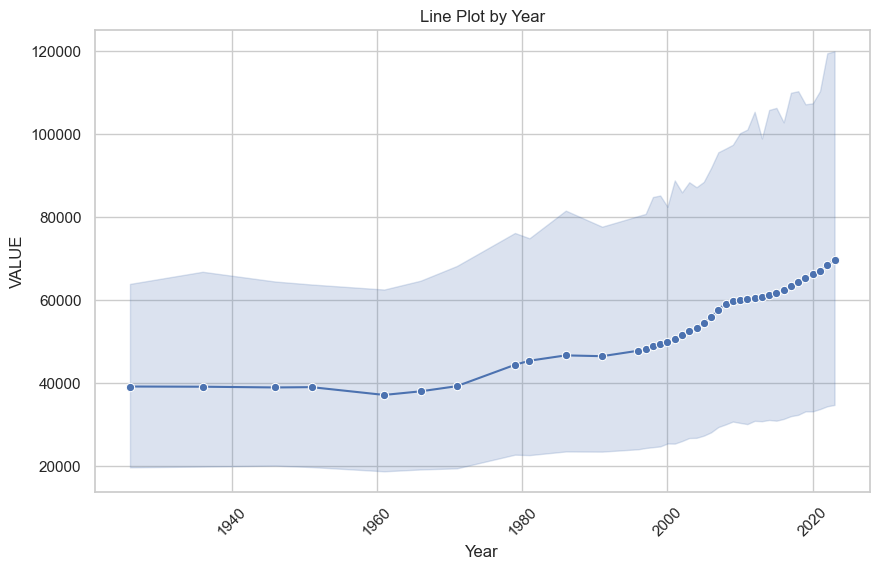

In [11]:
# Creating a line plot to show trends over the years
plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(x='Year', y='VALUE', data=df, marker='o')
line_plot.set(xlabel='Year', ylabel='VALUE', title='Line Plot by Year')
plt.xticks(rotation=45)
plt.show()

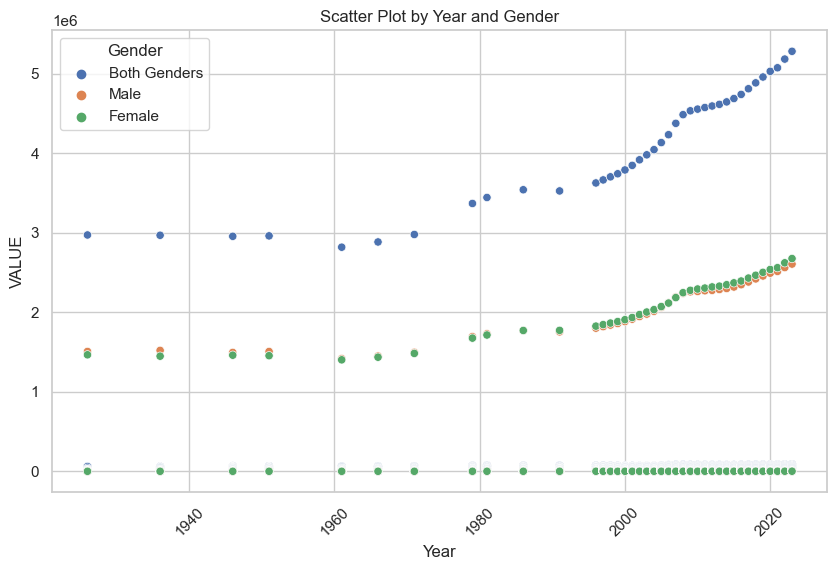

In [12]:
# Creating a scatter plot to explore relationships between Year and VALUE
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Year', y='VALUE', data=df, hue='Gender')
scatter_plot.set(xlabel='Year', ylabel='VALUE', title='Scatter Plot by Year and Gender')
plt.xticks(rotation=45)
plt.show()

# Using two discrete distributions Binomial and Poisson 

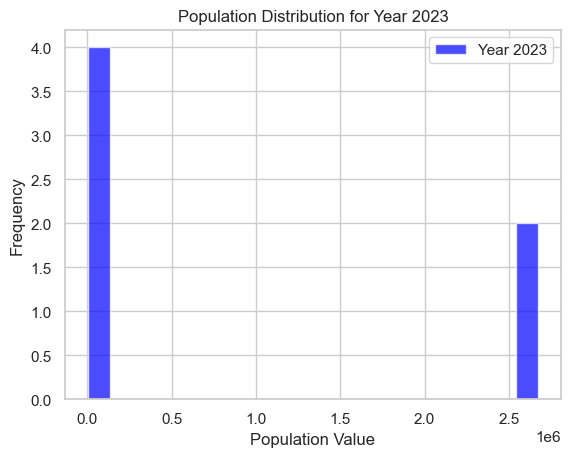

In [13]:
# Filtering the data by Single Year of Age and Gender
age_groups = ["All ages", "Under 1 year", "1 years to 98 years", "99 years and over"]
genders = ["Both sexes", "Male", "Female"]
filtered_df = df[(df["Single Year of Age"].isin(age_groups)) & (df["Gender"].isin(genders))]

# Extract the VALUE column as a NumPy array
values = filtered_df["VALUE"].values

# Creating a histogram for a specific year
year_to_visualize = 2023 
year_data = values[filtered_df["Year"] == year_to_visualize]

plt.hist(year_data, bins=20, color="blue", alpha=0.7, label=f"Year {year_to_visualize}")
plt.xlabel("Population Value")
plt.ylabel("Frequency")
plt.title(f"Population Distribution for Year {year_to_visualize}")
plt.legend()
plt.show()


# Binomial distribution

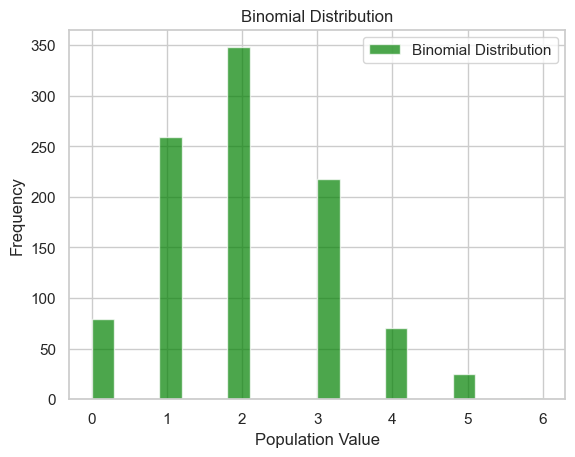

In [14]:
# Defining the parameters for the binomial distribution
n = len(year_data) 
p = year_data.mean() / year_data.max()  # Probability of success

# Generating a binomial distribution
binom_data = binom.rvs(n, p, size=1000)

# Visualizing the binomial distribution
plt.hist(binom_data, bins=20, color="green", alpha=0.7, label="Binomial Distribution")
plt.xlabel("Population Value")
plt.ylabel("Frequency")
plt.title("Binomial Distribution")
plt.legend()
plt.show()


# Poisson distribution

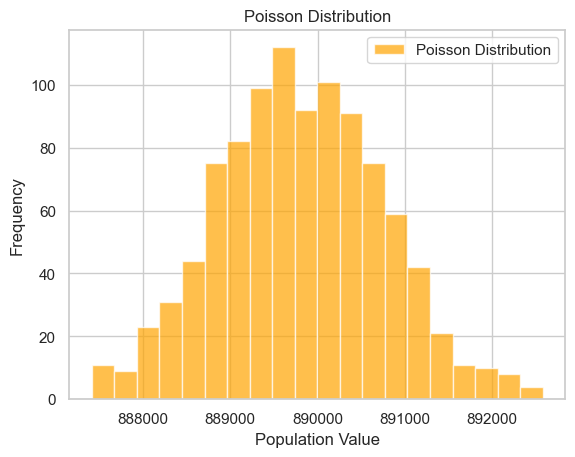

In [15]:
# Calculating the average population value for the Poisson distribution
average_value = year_data.mean()

# Generating a Poisson distribution
poisson_data = poisson.rvs(average_value, size=1000)

# Visualizing the Poisson distribution
plt.hist(poisson_data, bins=20, color="orange", alpha=0.7, label="Poisson Distribution")
plt.xlabel("Population Value")
plt.ylabel("Frequency")
plt.title("Poisson Distribution")
plt.legend()
plt.show()


# Using Normal distribution to explain and identify some information about the dataset

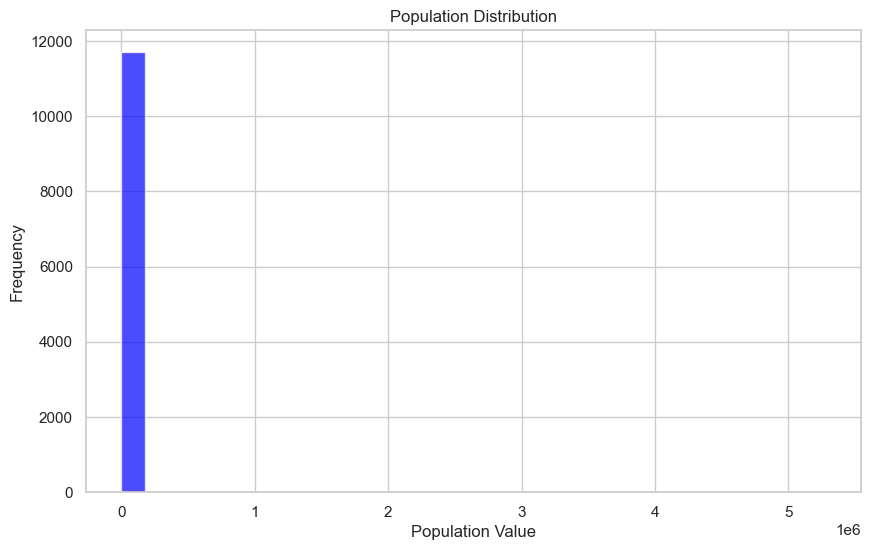

In [16]:
values = df["VALUE"].values
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, color="blue", alpha=0.7)
plt.xlabel("Population Value")
plt.ylabel("Frequency")
plt.title("Population Distribution")
plt.show()

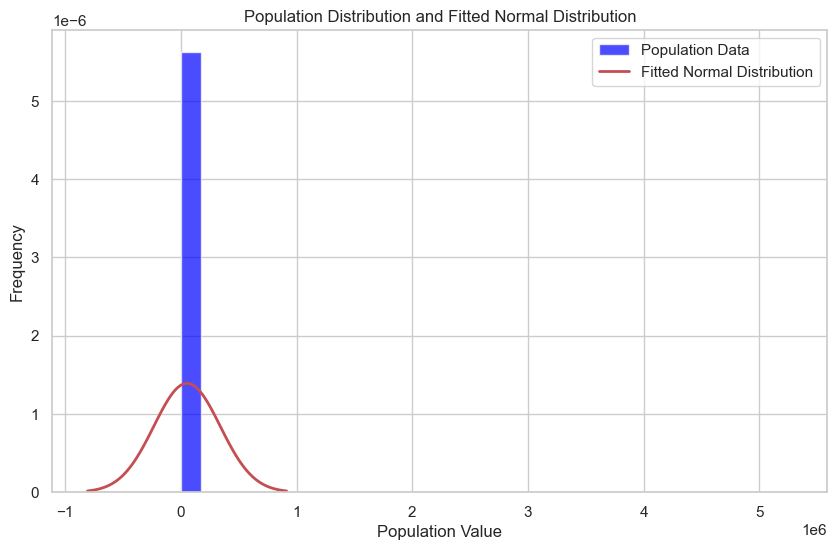

In [17]:
# Calculate the mean and standard deviation of the data
mean = np.mean(values)
std = np.std(values)

# Generating a range of values for the normal distribution
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
pdf = norm.pdf(x, mean, std)

# Visualizing the data and the fitted normal distribution
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, color="blue", alpha=0.7, density=True, label="Population Data")
plt.plot(x, pdf, 'r-', lw=2, label="Fitted Normal Distribution")
plt.xlabel("Population Value")
plt.ylabel("Frequency")
plt.title("Population Distribution and Fitted Normal Distribution")
plt.legend()
plt.show()


# Machine Learning:

In [18]:
summary_stats = df.describe()

In [19]:
summary_stats

,Year,VALUE
count,11817.000000,1.181700e+04
mean,1996.410256,5.352461e+04
std,24.463165,2.867754e+05
min,1926.000000,6.000000e+00
25%,1986.000000,1.242700e+04
50%,2004.000000,2.667500e+04
75%,2014.000000,3.557700e+04
max,2023.000000,5.281612e+06


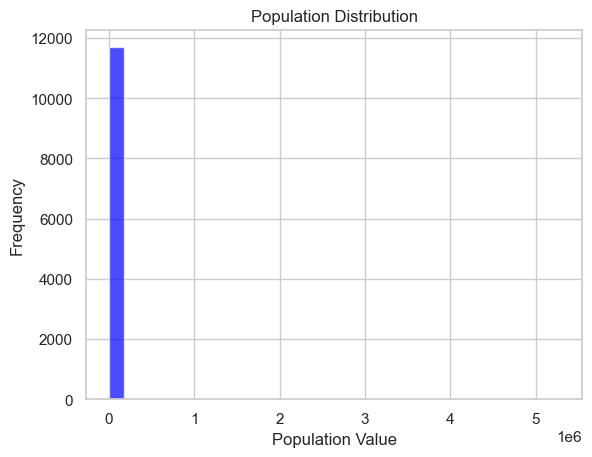

In [20]:
import matplotlib.pyplot as plt

# Creating a histogram for the VALUE column
plt.hist(df["VALUE"], bins=30, color="blue", alpha=0.7)
plt.xlabel("Population Value")
plt.ylabel("Frequency")
plt.title("Population Distribution")
plt.show()

# Time Series Plots

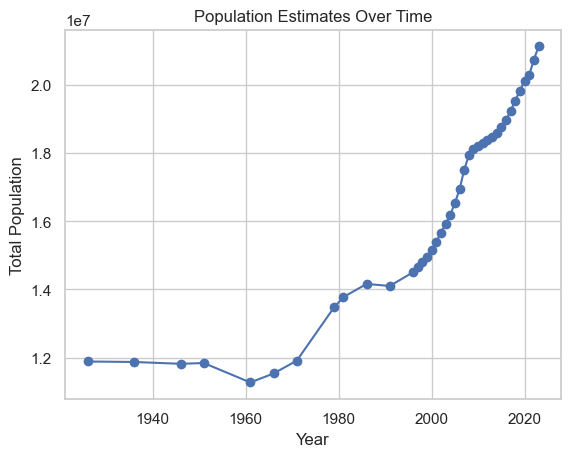

In [21]:
yearly_population = df.groupby("Year")["VALUE"].sum()

# Creating a time series plot
plt.plot(yearly_population.index, yearly_population.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Population Estimates Over Time")
plt.show()